<a href="https://colab.research.google.com/github/smartinternz02/SI-GuidedProject-581557-1694628549/blob/main/Mohamed_Irfan_assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Market Basket Magic: Extracting Insights for Retail Success 🛒**


## **Mohamed Irfan**

[Mall Customer Segmentation Dataset
](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/)

In [197]:
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import RcParams
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [198]:
df = pd.read_csv('/content/Mall_Customers.csv')
pd.set_option('display.max_colwidth', None)
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [199]:
df.shape

(200, 5)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [201]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [202]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


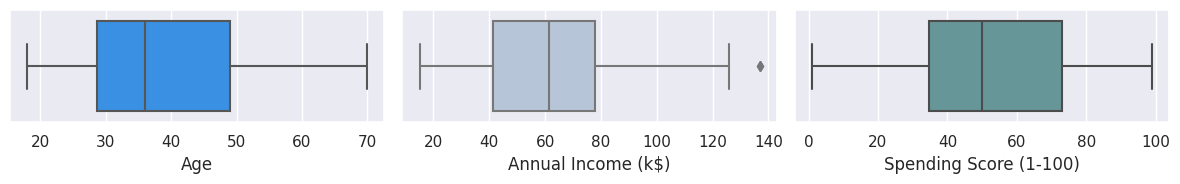

In [203]:
pl.figure(figsize=(12, 2))
colors = [ "#1E90FF", "#B0C4DE",  "#5F9EA0", "#007FFF"]
c=0
for i, feature in enumerate(df.iloc[:,-3:].columns):
    pl.subplot(1, 3, i+1)
    sns.boxplot(x=df[feature], color = colors[c])
    c+=1

pl.tight_layout()
pl.show()

### **Treating Outliers in the data**

In [204]:
def outlier(column):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)

  IQR = q3 - q1

  upper_limit = q3 + 1.5 * IQR
  lower_limit = q1 - 1.5 * IQR

  df.loc[df[column] > upper_limit, column] = df[column].median()
  df.loc[df[column] < lower_limit, column] = df[column].median()

In [205]:
for column in df.iloc[:,-3:].columns:
  outlier(column)

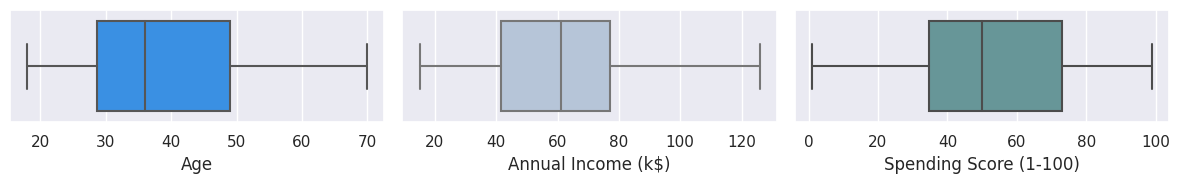

In [206]:
pl.figure(figsize=(12, 2))
colors = [ "#1E90FF", "#B0C4DE",  "#5F9EA0", "#007FFF"]
c=0
for i, feature in enumerate(df.iloc[:,-3:].columns):
    pl.subplot(1, 3, i+1)
    sns.boxplot(x=df[feature], color = colors[c])
    c+=1

pl.tight_layout()
pl.show()

In [207]:
print('Spending Scores :', sorted(df['Spending Score (1-100)'].unique()))

Spending Scores : [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 22, 23, 24, 26, 27, 28, 29, 31, 32, 34, 35, 36, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 65, 66, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99]


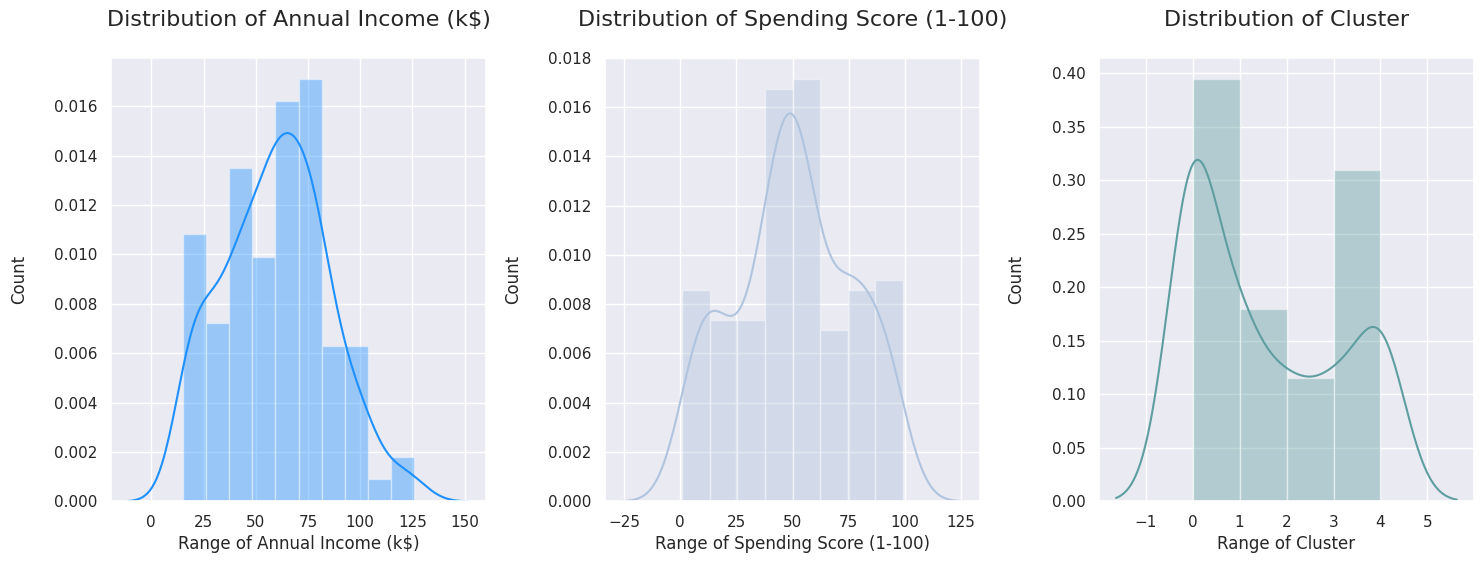

In [225]:
sns.set_palette('YlGnBu_r')


pl.figure(figsize=(15, 6))
colors = [ "#1E90FF", "#B0C4DE",  "#5F9EA0"]
c=0
for i, feature in enumerate(df.iloc[:,-3:].columns):
    pl.subplot(1, 3, i+1)
    sns.distplot(x=df[feature], color = colors[c])
    pl.title(f'Distribution of {feature}\n', fontsize = 16)
    pl.xlabel(f'Range of {feature}\n')
    pl.ylabel('Count\n')
    c+=1

pl.tight_layout()
pl.show()


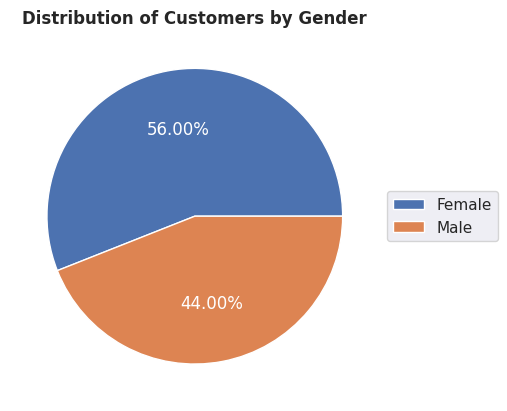

In [234]:
sns.set()
pl.pie(df['Gender'].value_counts(), labels=None, autopct=lambda p: f'{p:.2f}%',textprops={'color': 'white'})  # Hide labels
pl.title("Distribution of Customers by Gender", fontweight='bold')

pl.legend(df['Gender'].value_counts().index, loc="center left", bbox_to_anchor=(1, 0.5))

pl.show()
sns.set()

<Axes: >

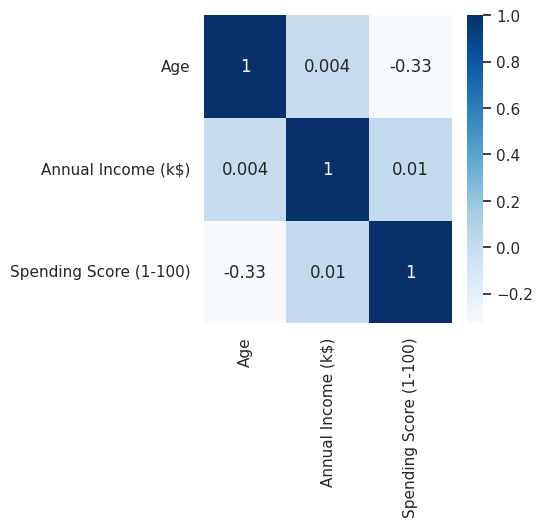

In [210]:
sns.set()
pl.figure(figsize=(4, 4))
sns.heatmap(df.iloc[:,-3:].corr(), annot = True, cmap = 'Blues')

The heatmap indicates that **there is'nt any appreciable or meaningful correlation** between any of the parameters.

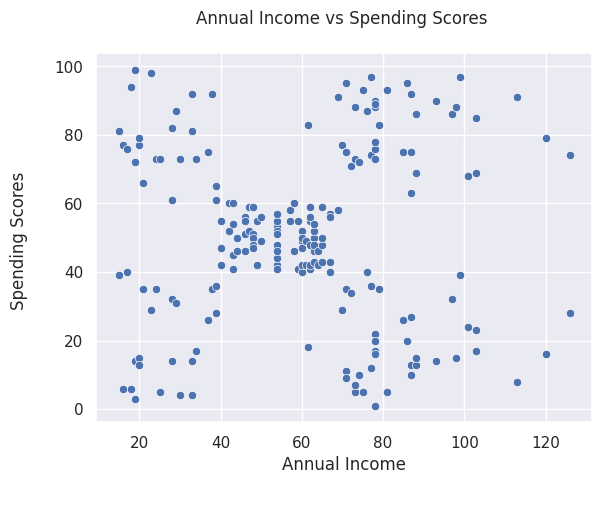

In [211]:
sns.scatterplot( x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df)
pl.title('Annual Income vs Spending Scores \n')
pl.xlabel('Annual Income\n')
pl.ylabel('Spending Scores \n')
pl.show()

We use the Annual income and Spending Score attributes to segment the customers

In [212]:
X=df[["Annual Income (k$)","Spending Score (1-100)"]]

## **Machine Learning**

In [213]:
from sklearn.cluster import KMeans

In [214]:
wcss = []
for i in range(1,11):
  model = KMeans(n_clusters = i)
  model.fit(X)
  wcss.append(model.inertia_)

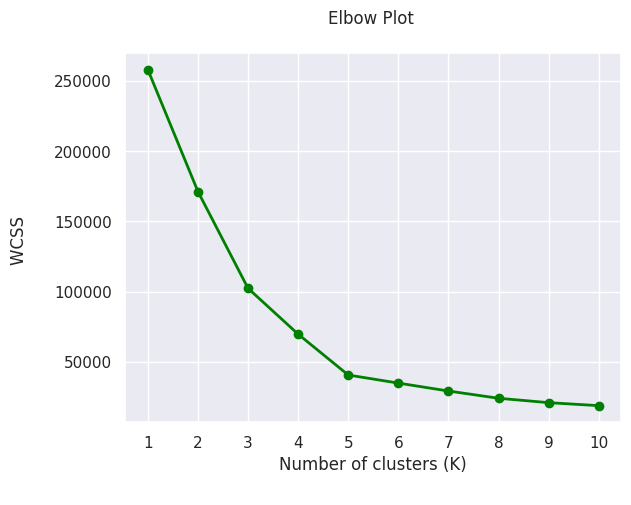

In [215]:
pl.plot(range(1,11),wcss, linewidth=2, color="green", marker ="o")
pl.title('Elbow Plot \n')
pl.xlabel('Number of clusters (K)\n')
pl.ylabel('WCSS \n')
pl.xticks(range(1,11))
pl.show()

From the elbow graph we can take **5** to be the number of clusters.

In [216]:
df1=df.copy()

km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the Clusters of the input data
y=km1.predict(X)
#adding the Clusters to a column named Cluster
df1["Cluster"] = y
#The new dataframe with the clustering done
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15.0,39,0
1,2,Male,21,15.0,81,3
2,3,Female,20,16.0,6,0
3,4,Female,23,16.0,77,3
4,5,Female,31,17.0,40,0


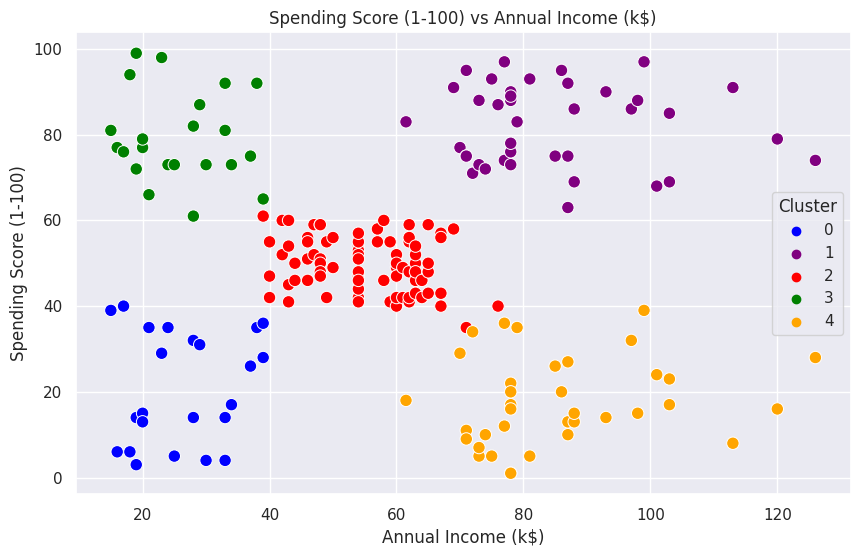

In [217]:
pl.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="Cluster",
                 palette=['blue', 'purple', 'red', 'green', 'orange'], legend='full',data = df1  ,s = 80 )
pl.xlabel('Annual Income (k$)')
pl.ylabel('Spending Score (1-100)')
pl.title('Spending Score (1-100) vs Annual Income (k$)')
pl.show()

### **Segmenting a sample customer**

In [218]:
data = [[82.0,39]]
print(f'This customer belongs to cluster {km1.predict(data)[0]}')

This customer belongs to cluster 4


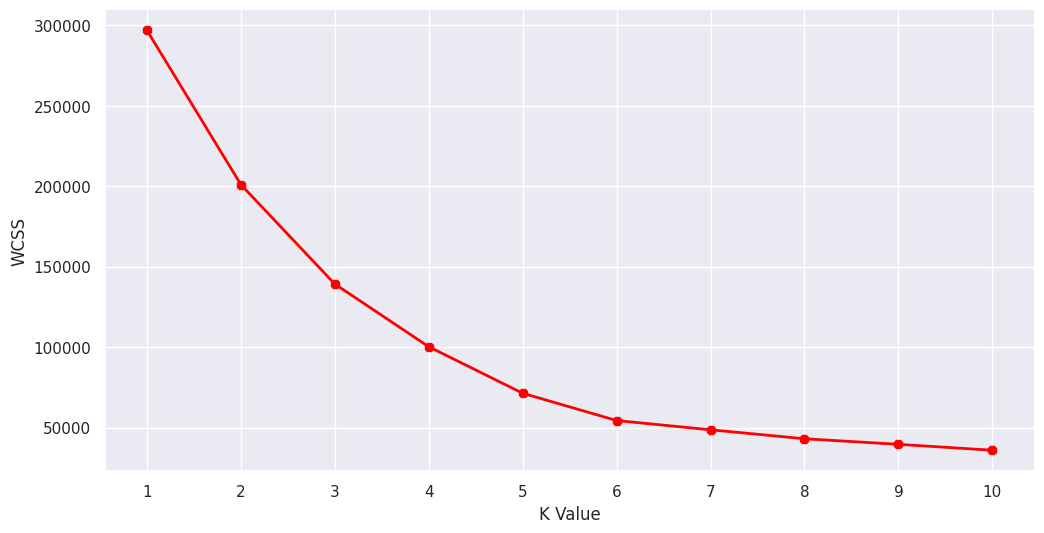

In [219]:
#Taking the features
X2=df[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
pl.figure(figsize=(12,6))
pl.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
pl.xlabel("K Value")
pl.xticks(np.arange(1,11,1))
pl.ylabel("WCSS")
pl.show()

In [220]:
df2=df.copy()

#We choose the k for which WSS starts to diminish
km2 = KMeans(n_clusters=5)
y2 = km2.fit_predict(X2)
df["Cluster"] = y2
#The data with Clusters
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15.0,39,3
1,2,Male,21,15.0,81,2
2,3,Female,20,16.0,6,3
3,4,Female,23,16.0,77,2
4,5,Female,31,17.0,40,3


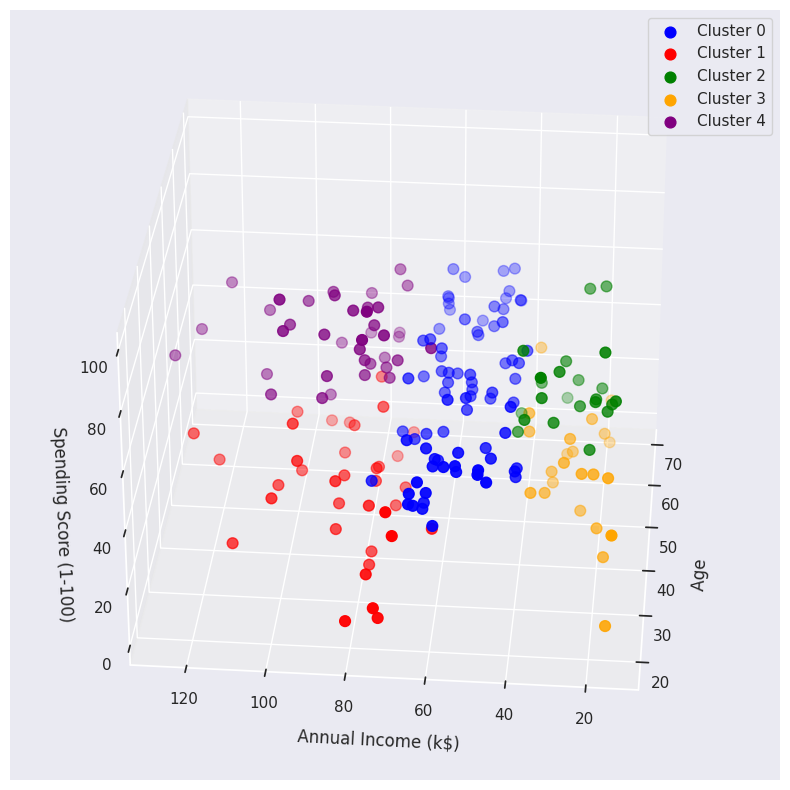

In [221]:
from mpl_toolkits.mplot3d import Axes3D
sns.set_theme()
fig = pl.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.Cluster == 0], df["Annual Income (k$)"][df.Cluster == 0], df["Spending Score (1-100)"][df.Cluster == 0], c='blue', s=60, label = 'Cluster 0')
ax.scatter(df.Age[df.Cluster == 1], df["Annual Income (k$)"][df.Cluster == 1], df["Spending Score (1-100)"][df.Cluster == 1], c='red', s=60, label = 'Cluster 1')
ax.scatter(df.Age[df.Cluster == 2], df["Annual Income (k$)"][df.Cluster == 2], df["Spending Score (1-100)"][df.Cluster == 2], c='green', s=60, label = 'Cluster 2')
ax.scatter(df.Age[df.Cluster == 3], df["Annual Income (k$)"][df.Cluster == 3], df["Spending Score (1-100)"][df.Cluster == 3], c='orange', s=60, label = 'Cluster 3')
ax.scatter(df.Age[df.Cluster == 4], df["Annual Income (k$)"][df.Cluster == 4], df["Spending Score (1-100)"][df.Cluster == 4], c='purple', s=60, label = 'Cluster 4')
ax.view_init(30, 185)
pl.xlabel("\n   Age")
pl.ylabel("\nAnnual Income (k$)")
ax.set_zlabel('\nSpending Score (1-100)')
pl.legend()
pl.show()

### **Segmenting sample customers**

In [222]:
data = [[16,11.0,35]]
print(f'This customer belongs to cluster {km2.predict(data)[0]}')

This customer belongs to cluster 3


In [223]:
data = [[89,65.0,115]]
print(f'This customer belongs to cluster {km2.predict(data)[0]}')

This customer belongs to cluster 4
